<a href="https://www.kaggle.com/code/yasinsoylu123/fetal-health-classification-teniq?scriptVersionId=124239782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

In [2]:
df=pd.read_csv("../input/heart-failure-prediction/heart.csv")

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
categorical_cols= df.select_dtypes(include=['object'])
print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

The dataset contains 5 categorical columns
Sex : 2 labels
ChestPainType : 4 labels
RestingECG : 3 labels
ExerciseAngina : 2 labels
ST_Slope : 3 labels


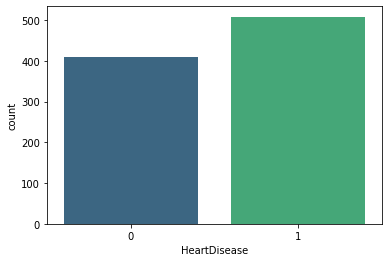

In [7]:
ax=sns.countplot(x= df["HeartDisease"], palette= "viridis")
plt.show()

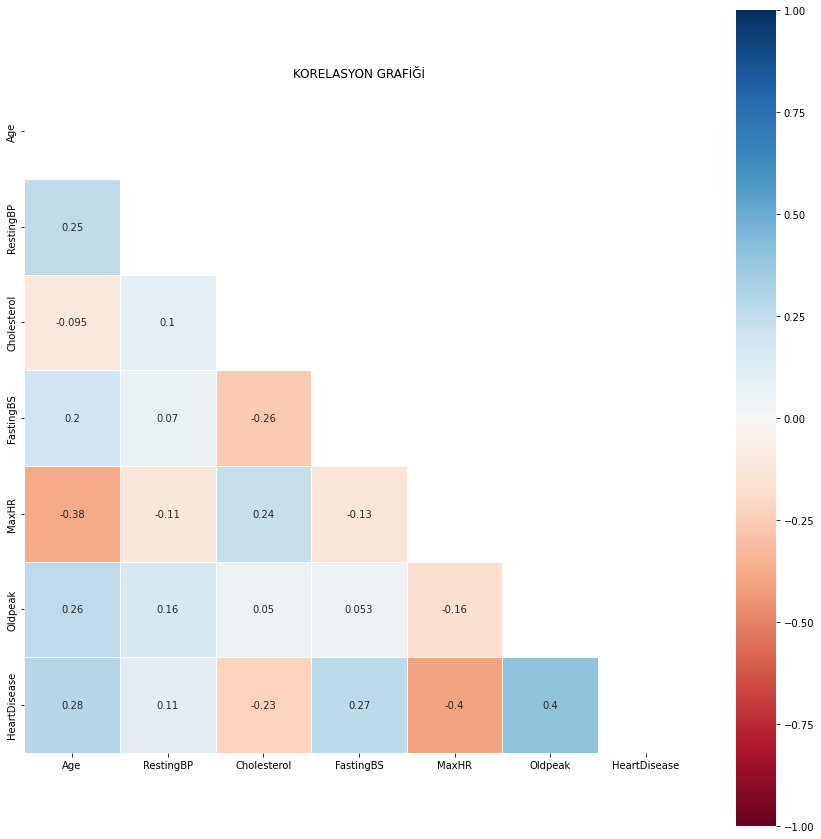

In [8]:
plt.figure(figsize=(15,15))

corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True, cmap="RdBu" ,vmin=1,vmax=-1,annot=True,linewidth=1)

plt.title("KORELASYON GRAFİĞİ")

plt.show()

In [9]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')


In [10]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')


In [11]:
fig = ff.create_distplot([df.Age],['Age'],bin_size=1)
iplot(fig)

In [12]:
histogram=px.histogram(data_frame=df,x="Age",nbins=60,title="age for HeartDisease",color="HeartDisease")


histogram.show()

In [13]:
histogram=px.histogram(data_frame=df,x="Cholesterol",nbins=90,color="HeartDisease")


histogram.show()

In [14]:
histogram=px.histogram(data_frame=df,x="RestingBP",nbins=90,color="HeartDisease",marginal="violin")


histogram.show()

In [15]:
histogram=px.histogram(data_frame=df,x="MaxHR",nbins=90,color="HeartDisease",marginal="violin")


histogram.show()

In [16]:
df["HeartDisease"].unique()

array([0, 1])

In [17]:
healthy=df[df["HeartDisease"]==0]["Age"]
disease=df[df["HeartDisease"]==1]["Age"]


hist_data = [healthy,disease]
group_labels = ['healthy', 'disease']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on disease Status")
fig.show()


In [18]:
healthy=df[df["HeartDisease"]==0]["MaxHR"]
disease=df[df["HeartDisease"]==1]["MaxHR"]


hist_data = [healthy,disease]
group_labels = ['healthy', 'disease']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in MaxHR on disease Status")
fig.show()


In [19]:
x1 = df["RestingBP"]
x2 = df["Cholesterol"]
x3 = df["MaxHR"]

# Group data together
hist_data = [x1, x2, x3]

group_labels = ['RestingBP', 'Cholesterol', 'MaxHR']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=10)
fig.show()

In [20]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [21]:
px.bar(df, x='ChestPainType', y='HeartDisease', color='Sex')

In [22]:
pie_chart=px.pie(data_frame=df, values="HeartDisease",names="ExerciseAngina",width=500,height=500,hole=.3)

pie_chart.show()

In [23]:
fig = px.pie(df, values='HeartDisease', names='Age')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
fig = px.pie(df, values='HeartDisease', names='Sex')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
fig = px.pie(df, values='HeartDisease', names='RestingECG')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [26]:
fig = px.pie(df, values='HeartDisease', names='ChestPainType')
fig.update_traces( textinfo='percent+label')
fig.show()

In [27]:
fig = px.pie(df, values='HeartDisease', names='ST_Slope')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [28]:
fig = px.pie(df, values='HeartDisease', names='FastingBS')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [29]:
df_tips = px.data.tips()
px.bar(df, x='HeartDisease', y='ChestPainType', color='Sex')

In [30]:
df_tips = px.data.tips()
px.bar(df, x='HeartDisease', y='RestingECG', color='Sex')

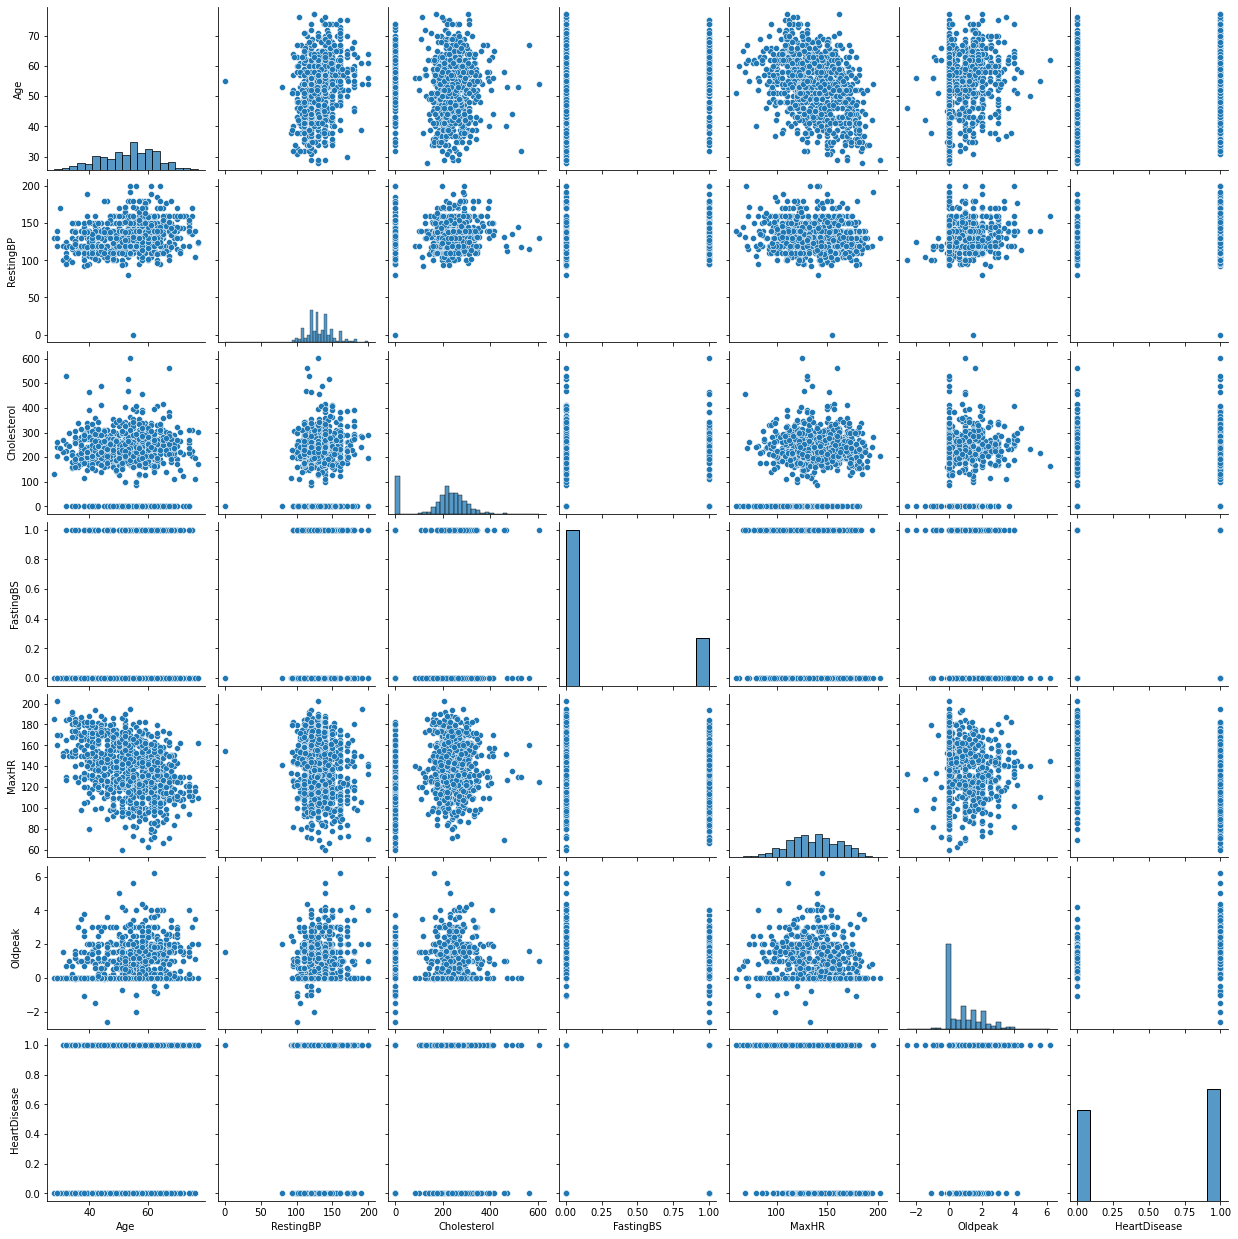

In [31]:
sns.pairplot(df)


In [32]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [33]:
df.duplicated().sum()


0

In [34]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [36]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (550, 11)
X_test:  (368, 11)
y_train:  (550,)
y_test:  (368,)


# Lojistik Regresyon 

In [38]:
import statsmodels.api as sm

loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.362984
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      907
Method:                           MLE   Df Model:                           10
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                  0.4720
Time:                        19:38:00   Log-Likelihood:                -333.22
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                1.470e-121
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.0273      0.010      2.753      0.006       0.008       0.047
Sex                1.4336      0.253      5.673      0.000       0.938       1.929
ChestPainType     -0.6925      0.106     -6.525      0.000      -0.901      -0.485
RestingBP          0.0077      0.005      1.537      0.124      -0.002       0.018
Cholesterol       -0.0036      0.001     -3.472      0.001      -0.006      -0.002
FastingBS          1.0875      0.257      4.229      0.000       0.584       1.592
RestingECG        -0.1288      0.161     -0.799      0.424      -0.445       0.187
MaxHR             -0.0039      0.004     -1.086      0.278      -0.011       0.003
ExerciseAngina     1.1403      0.229      4.985      0.000       0.692       1.589
Oldpeak            0.3684      0.115      3.209      0.001       0.143       0.594
ST_Slope          -1.6891      0.206     -8.182      0.000      -2.094      -1.284
==================================================================================
"""

In [39]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [40]:
loj_model.intercept_

array([0.76773913])

In [41]:
loj_model.coef_

array([[ 0.0234197 ,  1.30272628, -0.67330044,  0.00627767, -0.00364978,
         1.02005409, -0.14417393, -0.00618143,  1.0810561 ,  0.38065325,
        -1.62686172]])

# prediction & Model Tuning

In [42]:
y_pred = loj_model.predict(X)

In [43]:
confusion_matrix(y, y_pred)

array([[340,  70],
       [ 64, 444]])

In [44]:
accuracy_score(y, y_pred)

0.8540305010893247

In [45]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       410
           1       0.86      0.87      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



In [46]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [47]:
y.head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: HeartDisease, dtype: int64

In [48]:
loj_model.predict_proba(X)[0:10]

array([[0.90913037, 0.09086963],
       [0.80822455, 0.19177545],
       [0.8909953 , 0.1090047 ],
       [0.23315945, 0.76684055],
       [0.87364292, 0.12635708],
       [0.96427282, 0.03572718],
       [0.96608242, 0.03391758],
       [0.84322761, 0.15677239],
       [0.10547883, 0.89452117],
       [0.96099584, 0.03900416]])

In [49]:
y[0:10]

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: HeartDisease, dtype: int64

In [50]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

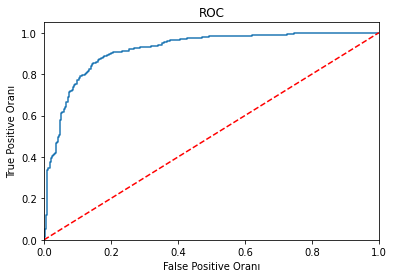

In [51]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Gaussian Naive Bayes

In [52]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [53]:
y_pred = nb_model.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.8532608695652174

In [55]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8478978978978979

# KNN

In [56]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [58]:
y_pred = knn_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8505434782608695

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       147
           1       0.90      0.85      0.87       221

    accuracy                           0.85       368
   macro avg       0.84      0.85      0.85       368
weighted avg       0.85      0.85      0.85       368



# SVC

In [60]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

svm_model

y_pred = svm_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8396739130434783

# # RBF SVC

In [61]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

svc_model

y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

# Cart

In [62]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)



y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7880434782608695

# Random Forests

In [63]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_model

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8722826086956522

# Gradient Boosting Machines

In [64]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695652173913043

# XGBoost

In [65]:
xgb_model = XGBClassifier().fit(X_train, y_train)

xgb_model

y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

[19:38:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8641304347826086

# LightGBM

In [66]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8722826086956522

# CatBoost

In [67]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

y_pred = cat_model.predict(X_test)

accuracy_score(y_test, y_pred)

Learning rate set to 0.007981
0:	learn: 0.6855750	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.6781695	total: 67ms	remaining: 33.5s
2:	learn: 0.6718423	total: 68.4ms	remaining: 22.7s
3:	learn: 0.6648303	total: 69.7ms	remaining: 17.4s
4:	learn: 0.6572909	total: 70.7ms	remaining: 14.1s
5:	learn: 0.6501156	total: 71.9ms	remaining: 11.9s
6:	learn: 0.6425737	total: 72.8ms	remaining: 10.3s
7:	learn: 0.6369131	total: 73.5ms	remaining: 9.11s
8:	learn: 0.6302370	total: 74.6ms	remaining: 8.22s
9:	learn: 0.6240649	total: 75.9ms	remaining: 7.51s
10:	learn: 0.6181551	total: 77.1ms	remaining: 6.93s
11:	learn: 0.6128045	total: 78.3ms	remaining: 6.44s
12:	learn: 0.6068715	total: 79.2ms	remaining: 6.01s
13:	learn: 0.6018997	total: 80.3ms	remaining: 5.65s
14:	learn: 0.5968077	total: 81.4ms	remaining: 5.35s
15:	learn: 0.5917799	total: 82.4ms	remaining: 5.07s
16:	learn: 0.5878728	total: 83.3ms	remaining: 4.82s
17:	learn: 0.5820508	total: 84.2ms	remaining: 4.6s
18:	learn: 0.5768559	total: 85.2ms	remaining: 4

0.875

In [68]:
modeller = [
    knn_model,
    loj_model,
    svc_model,
    nb_model,
    cart_model,
    rf_model,
    gbm_model,
    cat_model,
    lgbm_model,
    xgb_model,
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 85.0543%
----------------------------
LogisticRegression:
Accuracy: 85.0543%
----------------------------
SVC:
Accuracy: 87.5000%
----------------------------
GaussianNB:
Accuracy: 70.9239%
----------------------------
DecisionTreeClassifier:
Accuracy: 78.8043%
----------------------------
RandomForestClassifier:
Accuracy: 87.2283%
----------------------------
GradientBoostingClassifier:
Accuracy: 86.9565%
----------------------------
CatBoostClassifier:
Accuracy: 87.5000%
----------------------------
LGBMClassifier:
Accuracy: 87.2283%
----------------------------
XGBClassifier:
Accuracy: 86.4130%


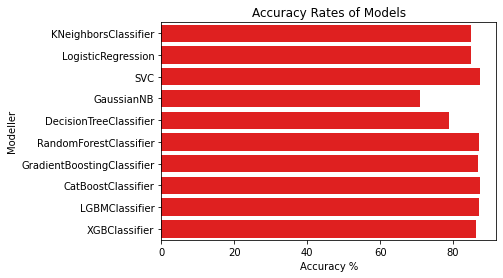

In [69]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy Rates of Models');   

# final model

In [70]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [71]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

# Model Tuning

In [72]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100,200]}

In [73]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 0)

svc_cv_model.fit(X_train, y_train)

svc_cv_model.best_params_

{'C': 1, 'gamma': 0.1}

In [74]:
svc_tuned = SVC(C = 1, gamma = 0.1).fit(X_train, y_train)

In [75]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.875